In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Drop rows with any missing values
df.dropna(inplace=True)


In [6]:
# Encode categorical variables (e.g., 'Genre')
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [7]:
# Display the DataFrame after encoding
print("\nDataFrame after encoding 'Genre':")
print(df.head())


DataFrame after encoding 'Genre':
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      0   19                  15                      39
1           2      0   21                  15                      81
2           3      1   20                  16                       6
3           4      1   23                  16                      77
4           5      1   31                  17                      40


In [8]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_mall_customers.csv'
df.to_csv(cleaned_file_path, index=False)

In [9]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       CustomerID       Genre         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [10]:
# Create histograms for age, annual income, and spending score distributions
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

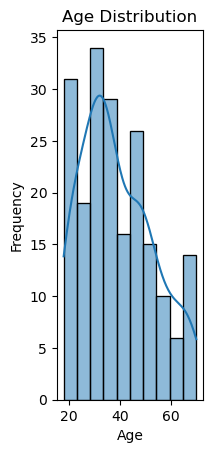

In [11]:
# Age histogram
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

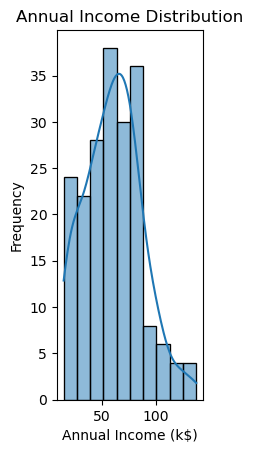

In [12]:
# Annual Income histogram
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

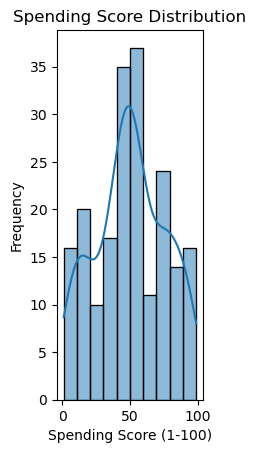

In [13]:
# Spending Score histogram
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

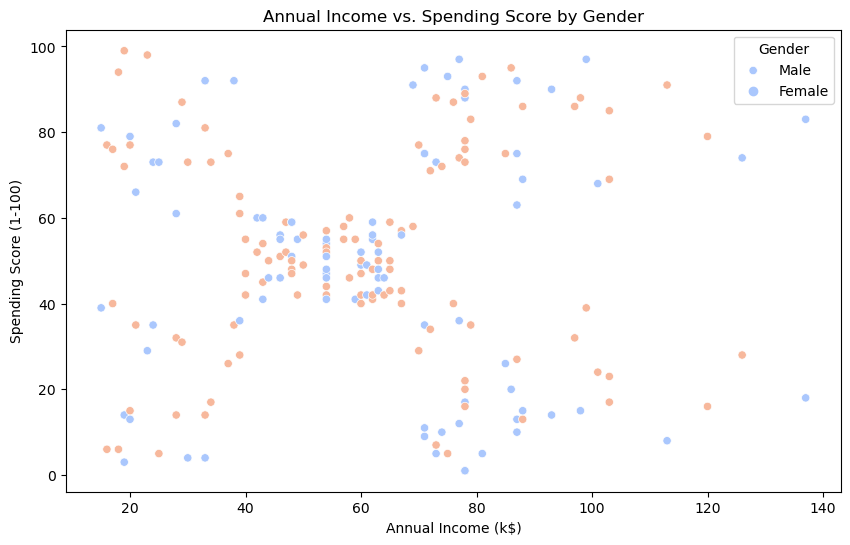

In [15]:
# Generate a scatter plot of annual income vs. spending score, colored by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='coolwarm')
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

In [16]:
# Standardize the features
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

In [17]:
# Standardize the features
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

In [18]:
# Apply K-Means clustering to segment the customers into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


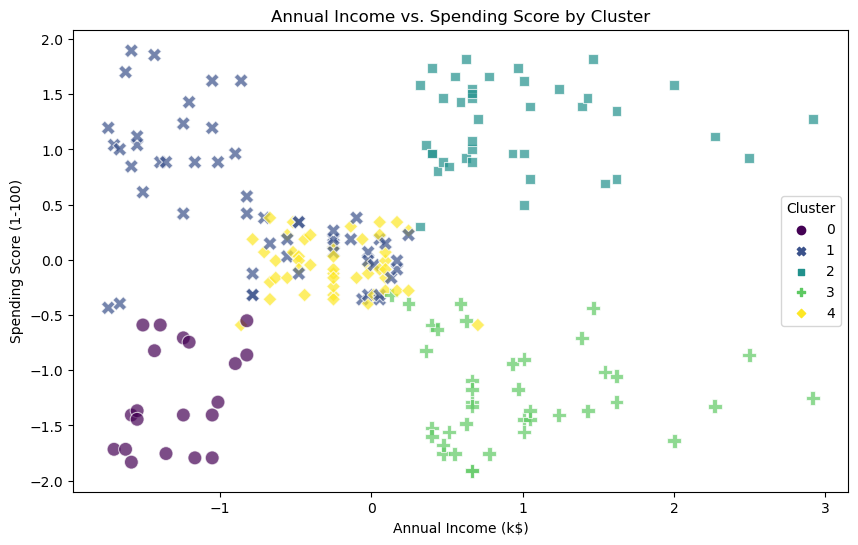

In [19]:
# Create a scatter plot of annual income vs. spending score, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='viridis', 
    style='Cluster', 
    s=100, 
    alpha=0.7
)
plt.title('Annual Income vs. Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()